## 3.4 多クラス分類

We can divide multiclass classifier into two type. One classifies directly into multiclass, another classifies by using multiple binary classifier

### OVA / OVR method
(one-versus-all / oner-versus-rest)

Create multiclass classifier with 10 binary classifier. Apply for each classifier and compare their score. The classifier with highest score will be the prediction.

### OVO method
(one-versus-one)

Create binary-classifier for each pair (0-1 classifier, 0-2 classifier, ... 1-2 classifier, ... 8-9 classifier). We need `N * (N - 1) / 2` classifiers for N classes. We need 45 classes for MNIST.


In [5]:
import numpy as np
import joblib

X, y, some_digit, X_train, X_test, y_train, y_test = joblib.load("ss-03/01.pkl")

scikit-learn use either OVA or OVO. It will be selected automatically when we use binary-classifier to classify muiticlass.

In [2]:
from sklearn.svm import SVC

# svm_clf = SVC()
# svm_clf.fit(X_train, y_train)

SVC()

In [3]:
# joblib.dump(svm_clf, "ss-03/svm_clf.pkl")

['ss-03/svm_clf.pkl']

In [ ]:
svm_clf = joblib.load("ss-03/svm_clf.pkl")

In [4]:
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [5]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [6]:
import numpy as np

index = np.argmax(some_digit_scores)
svm_clf.classes_[index]

5

`decision_function` for SVM multiclass classifier returns set of prediction scores for each class. In this case it returns 10 scores, and score of class 5 is the highest.

We need to use OneVsOneClassifier or OneVsRestClassifier to let scikit-learn use as designed.

In [11]:
# from sklearn.multiclass import OneVsRestClassifier

# ovr_clf = OneVsRestClassifier(SVC()) # use SVC for inner estimators
# ovr_clf.fit(X_train, y_train)
# ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [12]:
# joblib.dump(ovr_clf, "ss-03/ovr_clf.pkl")

['ss-03/ovr_clf.pkl']

In [ ]:
ovr_clf = joblib.load("ss-03/ovr_clf.pkl")

In [13]:
len(ovr_clf.estimators_)

10

We can use SGDClassifier (or RandomForestClassifier). We don't need to select OVA or OVO because SGDClassifier has capability to treat multiclass classification.

In [14]:
sgd_clf = joblib.load("ss-03/sgd_clf.pkl")

In [16]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [17]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [47]:
# joblib.dump(X_train_scaled, "ss-03/X_train_scaled.pkl")
X_train_scaled = joblib.load("ss-03/X_train_scaled.pkl")

['ss-03/X_train_scaled.pkl']

3.5　誤分類の分析

モデルの改良方法を見つける方法。誤分類のタイプを分析する。


In [48]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

In [49]:
joblib.dump(conf_mx, "ss-03/conf_mx.pkl")
# conf_mx = joblib.load("ss-03/conf_mx.pkl")

['ss-03/conf_mx.pkl']

Plot correct pre

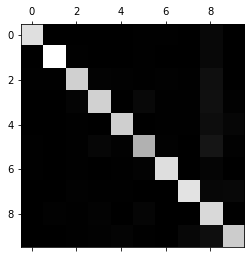

In [50]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [56]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]])

In [58]:
norm_conf_mx = (conf_mx / row_sums) # ratio within row
norm_conf_mx

array([[9.41583657e-01, 0.00000000e+00, 3.71433395e-03, 8.44166807e-04,
        1.35066689e-03, 7.25983454e-03, 6.07800101e-03, 1.01300017e-03,
        3.79875063e-02, 1.68833361e-04],
       [0.00000000e+00, 9.49273213e-01, 5.48798576e-03, 3.55977455e-03,
        5.93295758e-04, 6.52625334e-03, 5.93295758e-04, 1.03826758e-03,
        3.14446752e-02, 1.48323939e-03],
       [4.53172205e-03, 4.53172205e-03, 8.76132931e-01, 1.54414233e-02,
        1.22524337e-02, 4.53172205e-03, 1.12453844e-02, 6.04229607e-03,
        6.34441088e-02, 1.84625713e-03],
       [3.58832164e-03, 2.77279400e-03, 1.90833469e-02, 8.52552602e-01,
        3.26211059e-04, 3.31104224e-02, 4.40384929e-03, 6.52422117e-03,
        6.57315283e-02, 1.19067036e-02],
       [2.05409106e-03, 2.39643958e-03, 7.01814447e-03, 1.54056830e-03,
        8.87024991e-01, 2.05409106e-03, 5.81992468e-03, 4.62170490e-03,
        5.93974666e-02, 2.80725779e-02],
       [4.98063088e-03, 2.76701716e-03, 5.53403431e-03, 3.09905921e-02,
   

In [60]:
np.fill_diagonal(norm_conf_mx, 0) # remove positive results
norm_conf_mx

array([[0.        , 0.        , 0.00371433, 0.00084417, 0.00135067,
        0.00725983, 0.006078  , 0.001013  , 0.03798751, 0.00016883],
       [0.        , 0.        , 0.00548799, 0.00355977, 0.0005933 ,
        0.00652625, 0.0005933 , 0.00103827, 0.03144468, 0.00148324],
       [0.00453172, 0.00453172, 0.        , 0.01544142, 0.01225243,
        0.00453172, 0.01124538, 0.0060423 , 0.06344411, 0.00184626],
       [0.00358832, 0.00277279, 0.01908335, 0.        , 0.00032621,
        0.03311042, 0.00440385, 0.00652422, 0.06573153, 0.0119067 ],
       [0.00205409, 0.00239644, 0.00701814, 0.00154057, 0.        ,
        0.00205409, 0.00581992, 0.0046217 , 0.05939747, 0.02807258],
       [0.00498063, 0.00276702, 0.00553403, 0.03099059, 0.00977679,
        0.        , 0.01383509, 0.00258255, 0.09869028, 0.01106807],
       [0.00506928, 0.00253464, 0.00709699, 0.00050693, 0.00743494,
        0.01639067, 0.        , 0.00050693, 0.02213586, 0.00016898],
       [0.00335196, 0.00159617, 0.0081404

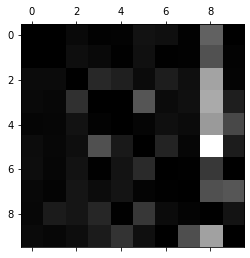

In [61]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

上の図から読み取れること

- 3,5は相互に間違われやすい
- 相互に間違われるとは限らない
  - 他の数字が誤って 8, 9 と判定されるケースは多い
    - 縦軸が 8, 9 の部分が明るい
  - 8が8以外と判定されるケースは、↑のケースに比べると多くない

3/5の区別、誤って8と判定されるケースに対しての改善を考える
- 8の判定改善
  - 閉じた輪の数をカウントする
  - 前処理して閉じた輪の部分を強調する
  - など
- 3/5の区別
  - ピクセルの位置がかなり一致する
    - 一致しない部分の出現位置のブレを減らす
      - 例：前処理で数字が直立するようにする

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def show_digit(digit):
  digit_image = digit.reshape(28, 28)

  plt.imshow(digit_image, cmap="binary")
  plt.axis("off")
  plt.show()

In [70]:
X_train2 = np.array(X_train)

In [71]:
cl_a, cl_b = 3, 5
X_aa = X_train2[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train2[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train2[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train2[(y_train == cl_b) & (y_train_pred == cl_b)]

In [9]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

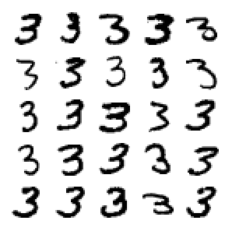

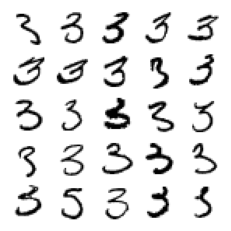

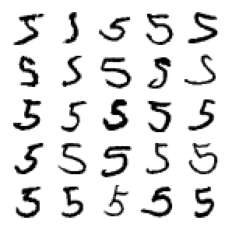

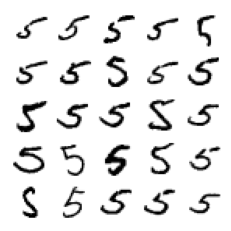

In [77]:
plot_digits(X_aa[:25], images_per_row=5)
plt.show()
plot_digits(X_ab[:25], images_per_row=5)
plt.show()
plot_digits(X_ba[:25], images_per_row=5)
plt.show()
plot_digits(X_bb[:25], images_per_row=5)
plt.show()

3.6　多ラベル分類

例：写真に写っている人にタグ付け

サンプルとして [与えられた数値が大きい値（7以上）, 奇数] の予測をする分類器を作成してみる

In [6]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
y_multilabel # [boolean: isLarge, boolean: isOdd]

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [81]:
knn_clf.predict([some_digit]) # 5 => [false, true]

array([[False,  True]])

## 3.7　多出力分類

事例：画像からノイズを取り除く

In [34]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

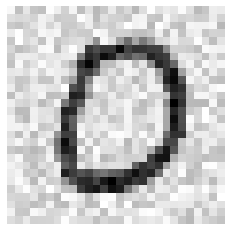

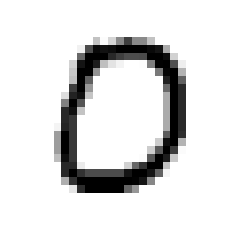

In [44]:
some_index = 10
show_digit(np.array(X_test_mod)[some_index])
show_digit(np.array(X_test)[some_index])

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

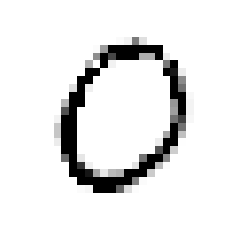

In [45]:
clean_digit = knn_clf.predict([np.array(X_test_mod)[some_index]])
show_digit(clean_digit)

## 3.8　演習問題

### 1

MNISTデータセット用の分類器を作り、テストセットで97%の正解率を目指しなさい。ヒント：このタスクでは、KNeighborsClassifierが効果的である。あとは、適切なハイパーパラメータ値を見つけるだけでよい（weightsとn_neighborsの2つのハイパーパラメータでグリッドサーチを試していただきたい）。

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).astype(np.float64))

In [88]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [89]:
knn_clf.predict([some_digit])

array([3], dtype=uint8)

Scaler を通すと some_digit (= 5) が誤判定される。3/5 は相互に間違えられやすい影響か？

In [91]:
cross_val_score(knn_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9376, 0.9411, 0.9424])

K近傍法＋正規化で約94%

In [94]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
  },
]

grid_search = GridSearchCV(
  knn_clf, 
  param_grid, 
  cv=5,
  verbose=3
)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.942 total time=  13.2s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.944 total time=  13.5s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.945 total time=  13.9s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.938 total time=  14.9s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.945 total time=  14.7s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.942 total time=  14.5s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.946 total time=  14.6s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.945 total time=  13.8s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.941 total time=  14.0s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.947 total time=  14.7s
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.941 total time=  19.5s
[CV 2/5] END ....n_neighbors=5, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [95]:
grid_search.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [96]:
grid_search.best_score_

0.94435

正解率は94%なので未達

In [97]:
knn_clf2 = KNeighborsClassifier(n_neighbors=4, weights='distance')
cross_val_score(knn_clf2, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9428, 0.9442, 0.9443])

解答例の best_params をそのまま適用しても未達

In [98]:
cross_val_score(knn_clf2, X_train, y_train, cv=3, scoring="accuracy")

array([0.9709 , 0.9698 , 0.97035])

標準化してない学習データを使った方がスコアが高い。。

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
  },
]

grid_search = GridSearchCV(
  knn_clf, 
  param_grid, 
  cv=5,
  verbose=3
)
grid_search.fit(X_train, y_train)

### 2

MNIST画像を任意の方向（上下左右）に1ピクセルずつずらす関数を書きなさい†5。次に、訓練セットのすべての画像について、4方向に1ピクセルずつずらした4つのコピーを作り、それを訓練セットに追加しなさい。最後に、この拡張訓練セットを使って自分にとって最良のモデルを訓練し、訓練セットに対する適合率を測定しなさい。モデルの性能がさらに上がったことがわかるだろう。このように訓練セットを人工的に増やすテクニックをデータ拡張（data augmentation）とか訓練セットの拡張（training set expansion）と呼ぶ。

> scipy.ndimage.interpolationモジュールのshift()関数を使えばよい。たとえば、shift(image, [2, 1], cval=0)を実行すると、画像は2ピクセル下、1ピクセル右に移動する。


In [8]:
from scipy.ndimage.interpolation import shift

def expand(digit):
  image = digit.reshape(28, 28)
  up = shift(image, [-1, 0])
  down = shift(image, [1, 0])
  left = shift(image, [0, -1])
  right = shift(image, [0, 1])
  return digit, up, down, left, right

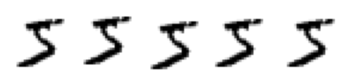

In [12]:
plot_digits(expand(some_digit), images_per_row=5)
plt.show()

In [157]:
def expand_label(val):
  return val, val, val, val, val

In [158]:
f = np.frompyfunc(expand_label, 1, 5)
y_train_expanded = np.ravel(f(np.array(y_train)))
y_train_expanded

array([5, 0, 4, ..., 5, 6, 8], dtype=object)

↑は想定通りではない

In [171]:
y_train_expanded = np.ravel([expand_label(y) for y in np.array(y_train)])
y_train_expanded

array([5, 5, 5, ..., 8, 8, 8], dtype=uint8)

In [174]:
X_train_expanded = np.ravel([expand(x) for x in np.array(X_train)])

In [176]:
len(X_train_expanded)

235200000

In [175]:
cross_val_score(knn_clf2, X_train_expanded, y_train_expanded, cv=3, scoring="accuracy")

ValueError: Found input variables with inconsistent numbers of samples: [235200000, 300000]

**方針転換**

解答例を参考に拡張

In [27]:
def expand(digit, x, y):
  image = digit.reshape(28, 28)
  _image = shift(image, [x, y], cval=0, mode="constant")
  return _image.reshape([-1])

In [28]:
X_train_expanded = [*np.array(X_train)]
y_train_expanded = [*y_train]

for x, y in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
  for image, label in zip(np.array(X_train), y_train):
    X_train_expanded.append(expand(image, x, y))
    y_train_expanded.append(label)

In [211]:
len(X_train_expanded)

300000

In [212]:
len(y_train_expanded)

300000

In [213]:
# knn_clf2 = KNeighborsClassifier(n_neighbors=4, weights='distance')
cross_val_score(knn_clf2, X_train_expanded, y_train_expanded, cv=3, scoring="accuracy")

array([0.98414, 0.98003, 0.97199])

拡張前 `array([0.9709 , 0.9698 , 0.97035])` に比べて性能が向上している

In [30]:
knn_clf2.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [31]:
y_pred = knn_clf2.predict(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [32]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [33]:
precision_score(y_test, y_pred, average='macro')

0.9766352308968693

In [34]:
precision_score(y_test, y_pred, average='micro')

0.9763

In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1132,    2,    0,    0,    0,    0,    0,    0,    1],
       [   6,    2, 1004,    2,    2,    0,    2,   13,    1,    0],
       [   0,    2,    2,  988,    1,    7,    0,    5,    3,    2],
       [   0,    5,    0,    0,  952,    0,    4,    2,    0,   19],
       [   2,    2,    0,    7,    0,  869,    5,    1,    3,    3],
       [   5,    4,    0,    0,    2,    2,  945,    0,    0,    0],
       [   0,   19,    5,    0,    2,    0,    0,  993,    0,    9],
       [   4,    1,    3,   10,    5,   10,    2,    3,  930,    6],
       [   2,    5,    1,    5,    6,    5,    0,    9,    0,  976]])